Implementation of Linear Least Squares that was provided:

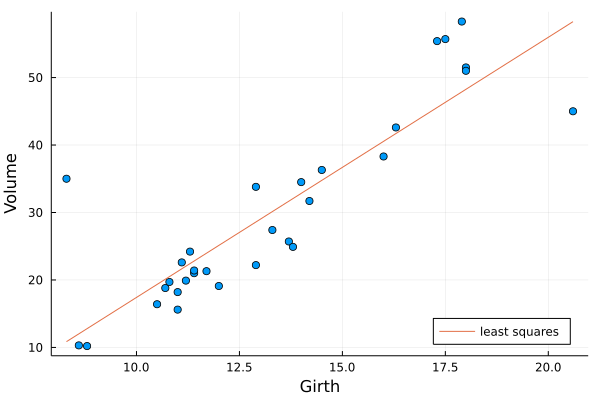

In [1]:
# solving linear ls via QR factorization. see nocedal ch 10.
using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots

# use the data on cherry trees
Trees = CSV.read("cherry-trees.csv", DataFrame)

fo = @formula(Volume ~ 1 + Girth)
A = modelmatrix(fo.rhs, Trees)      # the predictors
b = vec(modelmatrix(fo.lhs, Trees)) # the response

scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")

# solving linear ls via QR decomposition, see nocedal ch 10 pp 251
function lsqr(A, b)
    F = qr(A)     
    Q1 = Matrix(F.Q)  # the first n columns of Q
    R = F.R
    # now A == Q1*R
    # and x = PR^(-1)Q1'y
    x = R \ Q1'*b  # triangular substitution to solve Rx = Q1'b
                   # if pivoting was performed, then x = Px
end

x_ls = lsqr(A, b)   # solve using our implementation

# plot the two regression lines
scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")
g(x) = x_ls[1] + x_ls[2]*x  # the least squares regression line
plot!(g,
      label = "least squares",
      legend = :bottomright)


# note the call to plot! reuses the x values and passes them to g()

To test the weighted least squares function, we will be using the same data:

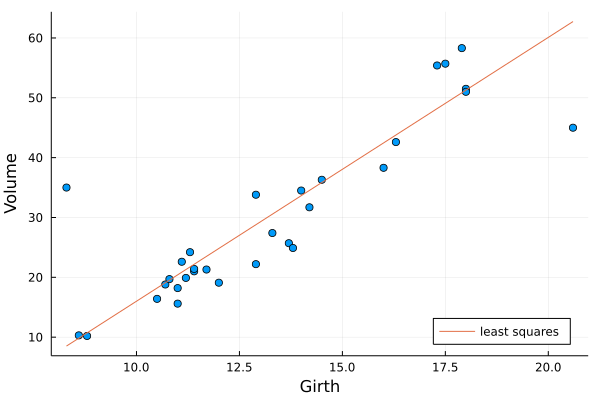

In [1]:
using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots

Trees = CSV.read("cherry-trees.csv", DataFrame)

fo = @formula(Volume ~ 1 + Girth)
A = modelmatrix(fo.rhs, Trees)      # the predictors
b = vec(modelmatrix(fo.lhs, Trees)) # the response

scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")

#Modified lsqr() function with Weighted Matrix parameter
function wlsqr(A, b, W) #where W is the matrix of weights
    F = qr(sqrt.(W) * A)
    Q1 = Matrix(F.Q)
    R = F.R
    x = R \ Q1'*b
end

W = diagm(vcat(0.5, ones(29), 0.5)) 
wx_ls = wlsqr(A,b,W)

scatter(A[:,2], b, label="", xlabel="Girth", ylabel="Volume")
g(x) = wx_ls[1] + wx_ls[2]*x  # the least squares regression line
plot!(g,
      label = "least squares",
      legend = :bottomright)

In [3]:
x_ls

2-element Vector{Float64}:
 -21.14850686134058
   3.8558648957914743

In [2]:
wx_ls

2-element Vector{Float64}:
 -28.082418094638804
   4.408936492956686

As shown above, we can see that the effect of the outliers (first and last data points) are lessened due to the weights and that the slope of the weighted least squares solution (4.409) is greater and the intercept (-28.08) is less as well due to the change in slope. Because the outliers have less of an effect on the estimated parameters, the weighted solution does a better job at finding the line of best fit.  